Build a regression model.

In [9]:
import pandas as pd
import statsmodels.api as sm
new_dataframe = pd.read_csv('..\\data\\new_dataframe.csv')

new_dataframe

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.address2,location.address3,location.city,location.zip_code,location.state,location.display_address,attributes.business_temp_closed,attributes.menu_url,attributes.open24_hours,attributes.waitlist_reservation
0,4d93318162ad5481a9ec7b4b,"[{'id': 10027, 'name': 'Museum', 'short_name':...",[],VeryLikelyOpen,172.000000,/v3/places/4d93318162ad5481a9ec7b4b,Whitehern Historic House and Garden,America/Toronto,43.254593,-79.872110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50a19225e4b035e940520491,"[{'id': 13305, 'name': 'Burrito Restaurant', '...",[{'id': '2d108fae-d80a-482b-a105-57ab79c2581e'...,VeryLikelyOpen,320.000000,/v3/places/50a19225e4b035e940520491,Burrito Boyz,America/Toronto,43.255691,-79.867215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55de230f498eecf46f6652a2,"[{'id': 13306, 'name': 'Taco Restaurant', 'sho...",[],VeryLikelyOpen,343.000000,/v3/places/55de230f498eecf46f6652a2,The Mule,America/Toronto,43.257258,-79.867202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4b628f4bf964a5205a4b2ae3,"[{'id': 17065, 'name': 'Farmers Market', 'shor...",[],LikelyOpen,395.000000,/v3/places/4b628f4bf964a5205a4b2ae3,Hamilton Farmers' Market,America/Toronto,43.259041,-79.870193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,511d7162e4b084a5d1f26958,"[{'id': 13065, 'name': 'Restaurant', 'short_na...",[],VeryLikelyOpen,357.000000,/v3/places/511d7162e4b084a5d1f26958,The George Hamilton,America/Toronto,43.258200,-79.873853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,NaN,"[{'alias': 'bbq', 'title': 'Barbeque'}]",NaN,NaN,870.642254,NaN,Charred Chicken,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8R 2L2,ON,"['244 James Street N', 'Hamilton, ON L8R 2L2',...",NaN,NaN,NaN,NaN
2376,NaN,"[{'alias': 'japanese', 'title': 'Japanese'}]",NaN,NaN,434.625159,NaN,Sapporo Japanese Restaurant,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8N 1G3,ON,"['96 Main St E', 'Hamilton, ON L8N 1G3', 'Cana...",NaN,NaN,NaN,NaN
2377,NaN,"[{'alias': 'mideastern', 'title': 'Middle East...",NaN,NaN,727.434649,NaN,La Luna,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8P 1B1,ON,"['306 King Street W', 'Hamilton, ON L8P 1B1', ...",NaN,NaN,NaN,NaN
2378,NaN,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",NaN,NaN,572.271873,NaN,Bronzie's Place,NaN,NaN,NaN,...,NaN,NaN,Hamilton,L8P 3A8,ON,"['201 James Street S', 'Hamilton, ON L8P 3A8',...",NaN,http://bronzies.ca/lunch-dinner-menu/,NaN,NaN


In [10]:
print(new_dataframe.head())
print(new_dataframe.describe())

                     fsq_id  \
0  4d93318162ad5481a9ec7b4b   
1  50a19225e4b035e940520491   
2  55de230f498eecf46f6652a2   
3  4b628f4bf964a5205a4b2ae3   
4  511d7162e4b084a5d1f26958   

                                          categories  \
0  [{'id': 10027, 'name': 'Museum', 'short_name':...   
1  [{'id': 13305, 'name': 'Burrito Restaurant', '...   
2  [{'id': 13306, 'name': 'Taco Restaurant', 'sho...   
3  [{'id': 17065, 'name': 'Farmers Market', 'shor...   
4  [{'id': 13065, 'name': 'Restaurant', 'short_na...   

                                              chains   closed_bucket  \
0                                                 []  VeryLikelyOpen   
1  [{'id': '2d108fae-d80a-482b-a105-57ab79c2581e'...  VeryLikelyOpen   
2                                                 []  VeryLikelyOpen   
3                                                 []      LikelyOpen   
4                                                 []  VeryLikelyOpen   

   distance                                

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


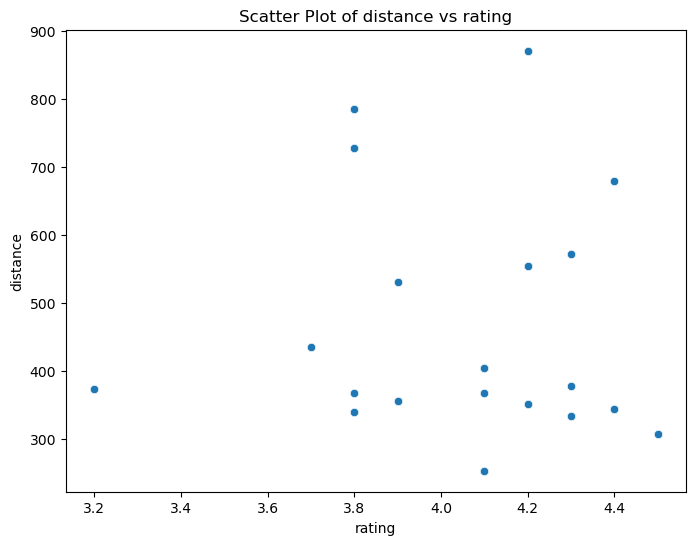

In [17]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_dataframe, x='rating', y='distance')
plt.title('Scatter Plot of distance vs rating')
plt.xlabel('rating')
plt.ylabel('distance')
plt.show()

In [13]:
print(new_dataframe.columns)  # Print column names
print(new_dataframe.dtypes)   # Print data types of columns

Index(['fsq_id', 'categories', 'chains', 'closed_bucket', 'distance', 'link',
       'name', 'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.address',
       'location.country', 'location.formatted_address', 'location.locality',
       'location.postcode', 'location.region', 'location.cross_street',
       'geocodes.drop_off.latitude', 'geocodes.drop_off.longitude',
       'related_places.children', 'location.address_extended', 'Station Name',
       'id', 'alias', 'image_url', 'is_closed', 'url', 'review_count',
       'rating', 'transactions', 'price', 'phone', 'display_phone',
       'coordinates.latitude', 'coordinates.longitude', 'location.address1',
       'location.address2', 'location.address3', 'location.city',
       'location.zip_code', 'location.state', 'location.display_address',
       'attributes.business_temp_closed', 'attributes.menu_url',
       'attributes.open24_hours', 'attribute

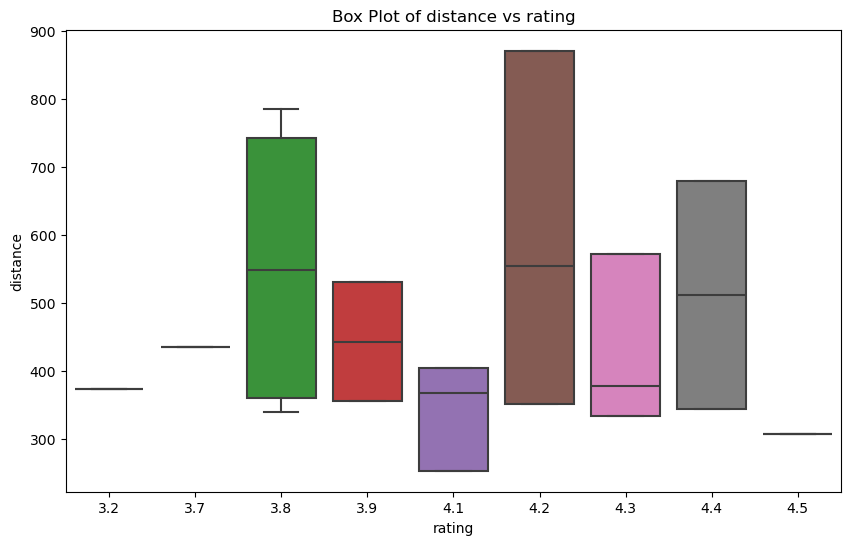

In [19]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_dataframe, x='rating', y='distance')
plt.title('Box Plot of distance vs rating')
plt.xlabel('rating')
plt.ylabel('distance')
plt.show()

c:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


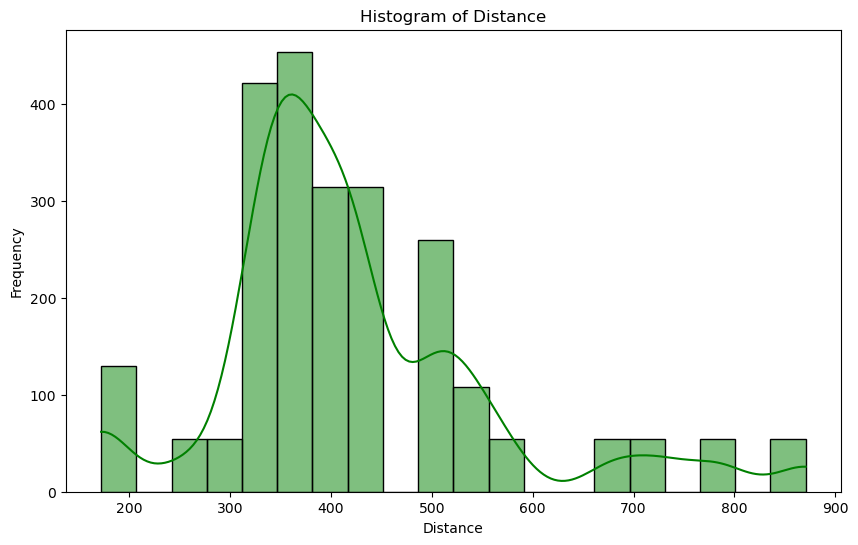

In [21]:
# Histogram for 'distance'
plt.figure(figsize=(10, 6))
sns.histplot(data=new_dataframe, x='distance', kde=True, color='green', bins=20)
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Define independent variable (X) and dependent variable (y)
X = new_dataframe['distance']
y = new_dataframe['rating']

# Adding constant
X = sm.add_constant(X)

Provide model output and an interpretation of the results. 

In [25]:
# Creating the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Apr 2024   Prob (F-statistic):                nan
Time:                        22:15:57   Log-Likelihood:                    nan
No. Observations:                2380   AIC:                               nan
Df Residuals:                    2378   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

# Stretch

How can you turn the regression model into a classification model?

Define Classes: Determine the classes or categories you want to classify the data into

Set Thresholds: Define thresholds or ranges

Evaluate Classification Performance: Evaluate the performance of the classification model using appropriate metrics 

Interpret Results: Interpret the results of the classification model and draw insights



